# Exploring the content of variables


This dataframe contains 8 variables that correspond to:

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description** : Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("cluster.csv", encoding= 'unicode_escape') #UnicodeDecodeError-Python will interpret these escape sequences 
# and convert them into the corresponding Unicode characters. 

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

# Data Overview and Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# To see where's the most of the customer are from
data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

Most of the customers are from UK

In [7]:
#we are not going to use stock code so drop it
data.drop('StockCode',axis=1,inplace=True)

In [8]:
data.shape

(541909, 7)

In [9]:
data.isnull().sum()

InvoiceNo           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(406829, 7)

Checking for negative values

In [12]:
data[data['Quantity'] < 0]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...
540449,C581490,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [13]:
data[data['UnitPrice'] < 0]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [14]:
# drop negative values
data.drop(data[data['Quantity'] < 0].index, inplace = True)
data.drop(data[data['UnitPrice'] < 0].index, inplace = True)

In [15]:
data.shape

(397924, 7)

# RFM ANALYSIS

We are going to analysis the Customers based on below 4 factors:

1.Total amount a customer spent: Amount = Quantity * UnitPrice

2.Number of transaction: Number of InvoiceNo by Customer

3.Last transaction: the days since last transaction

4.Country: country where customer made the transaction

## 1.Total amount a customer spent: Amount = Quantity * UnitPrice

In [16]:
#creating feature for amount spend by customer
data['amount']=data['Quantity']*data['UnitPrice']

In [17]:
data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [18]:
#Total amount of each customer 
ta=data.groupby('CustomerID')['amount'].sum().reset_index()
ta

,CustomerID,amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


So these are customers paying amount 

## 2.Number of transaction: Number of InvoiceNo by Customer

In [19]:
#number of transaction done by a customer:
nt=data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
nt

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


## 3.Last transaction: the days since last transaction

In [20]:
#Last transaction: 
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Last_transaction']=(data['InvoiceDate'].max()-data['InvoiceDate']).dt.days
lt = data.groupby(['CustomerID','Country'])['Last_transaction'].max().reset_index()
lt

,CustomerID,Country,Last_transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


## 4. Creating RFM dataset: Merging and Creating the RFM dataset:

In [21]:
merge1= pd.merge(lt, nt, how='inner', on='CustomerID')
merge1

,CustomerID,Country,Last_transaction,InvoiceNo
0,12346.0,United Kingdom,325,1
1,12347.0,Iceland,366,182
2,12348.0,Finland,357,31
3,12349.0,Italy,18,73
4,12350.0,Norway,309,17
...,...,...,...,...
4342,18280.0,United Kingdom,277,10
4343,18281.0,United Kingdom,180,7
4344,18282.0,United Kingdom,125,12
4345,18283.0,United Kingdom,336,756


In [22]:
new_df=pd.merge(merge1,ta,how='inner',on= 'CustomerID')
new_df

,CustomerID,Country,Last_transaction,InvoiceNo,amount
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


# EDA
## 1) Remove Outlier:

There are several method to remove outlier such as IQR method, Z-score Method, Standard Deviation Method.
In this kernel, I will use IQR method to remove outliers.
First, I will plot the boxplot to show the distribution of new data.

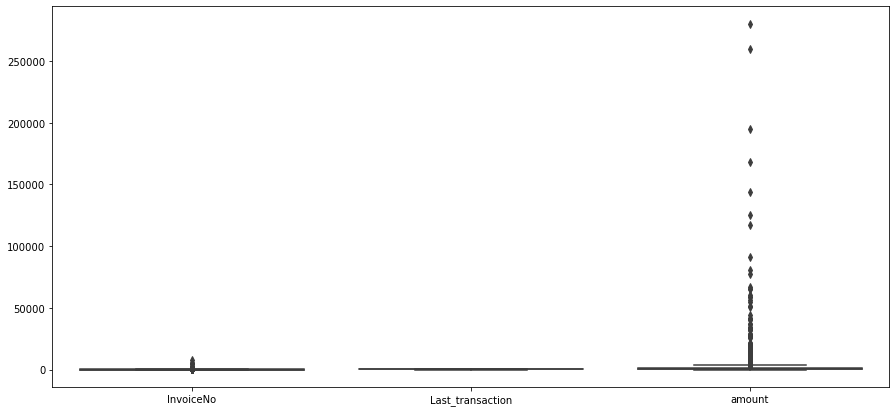

In [23]:
plt.figure(figsize=(15,7))
sns.boxplot(data = new_df[['InvoiceNo','Last_transaction','amount']])
plt.show()

## **Winsorization :**

Winsorization is a statistical technique used to deal with outliers in a dataset. It involves replacing extreme values (outliers) with values that are closer to the center of the distribution. This helps to mitigate the influence of outliers on statistical analysis and modeling.

There are two main types of Winsorization:

**Winsorization from Below**: This involves replacing the lower extreme values with values at the lower threshold. It is used to handle positively skewed distributions.

**Winsorization from Above**: This involves replacing the upper extreme values with values at the upper threshold. It is used to handle negatively skewed distributions.

 For example, 90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value of the data at the 5th percentile. 

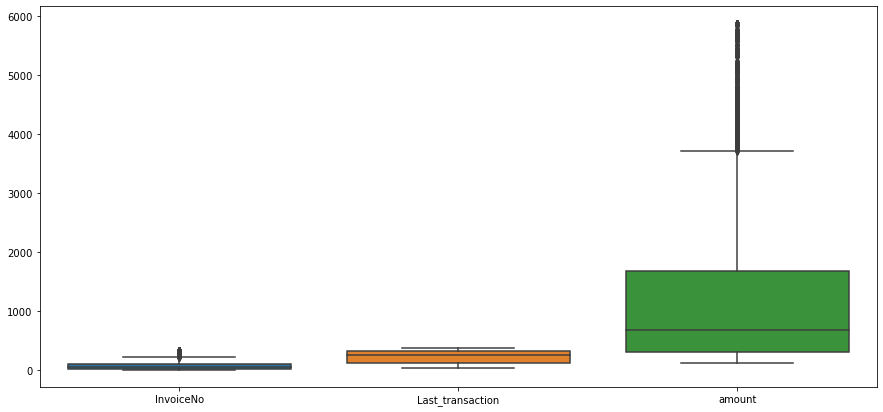

In [24]:
from scipy.stats.mstats import winsorize
winsorize(new_df['InvoiceNo'],(0.05,0.05),inplace=True)
winsorize(new_df['Last_transaction'],(0.05,0.05),inplace=True)
winsorize(new_df['amount'],(0.05,0.05),inplace=True)
plt.figure(figsize=(15,7))
sns.boxplot(data = new_df[['InvoiceNo','Last_transaction','amount']])
plt.show()

In [29]:
### The new data frame after replacing outlier
new_df.reset_index(drop=True, inplace= True)
new_df

,CustomerID,Country,Last_transaction,InvoiceNo,amount
0,12346.0,United Kingdom,325,4,5870.08
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,25,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,112.25
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,314,2094.88


## 2.Data Visualization

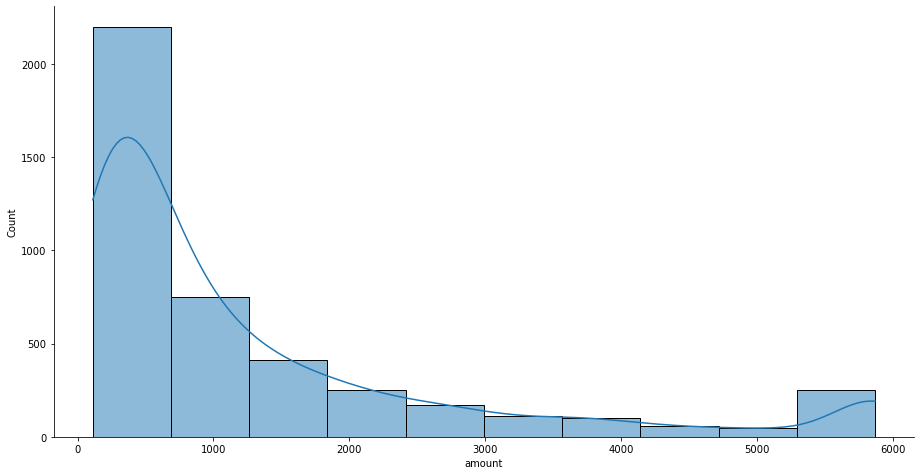

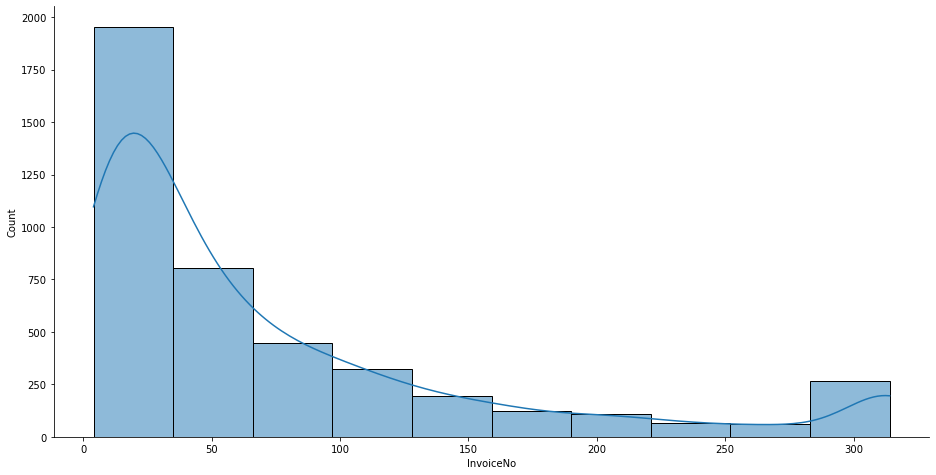

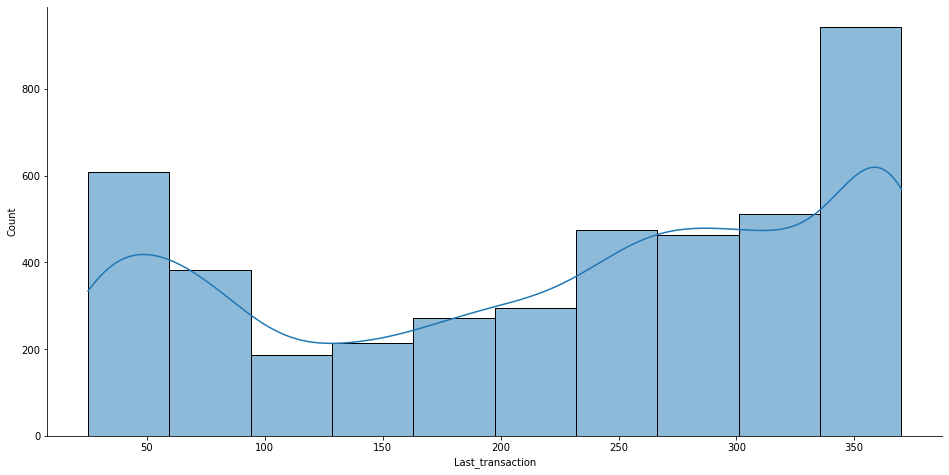

In [30]:
#distribution Plot: 
new1_df=new_df.copy()
df_num=['amount','InvoiceNo','Last_transaction']
for i in df_num:
    sns.displot(new1_df[i],bins=10,kde=True)
    plt.gcf().set_size_inches(15, 7)
    plt.show()

Total Amount (Monetary) and InvoiceNo (Frequency) histogram are right-skewed

Last_Transaction (Recency) histogram is bimodal

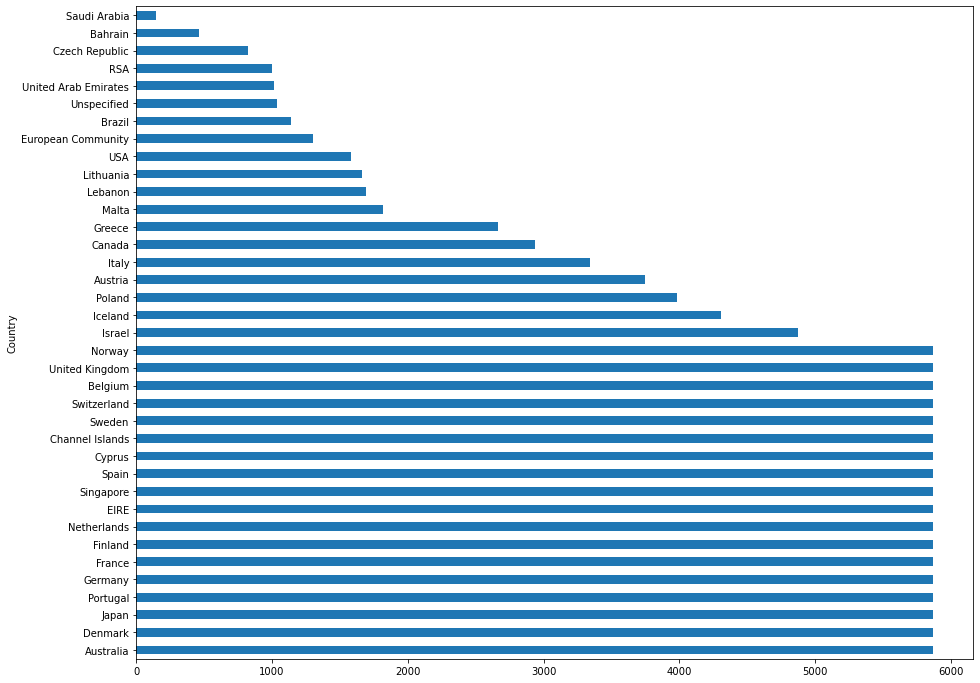

In [31]:
# Group the Maximum Total Amount by Country:
plt.figure(figsize=(15,12))
new1_df.groupby("Country").amount.max().sort_values(ascending=False).plot.barh()
plt.show()

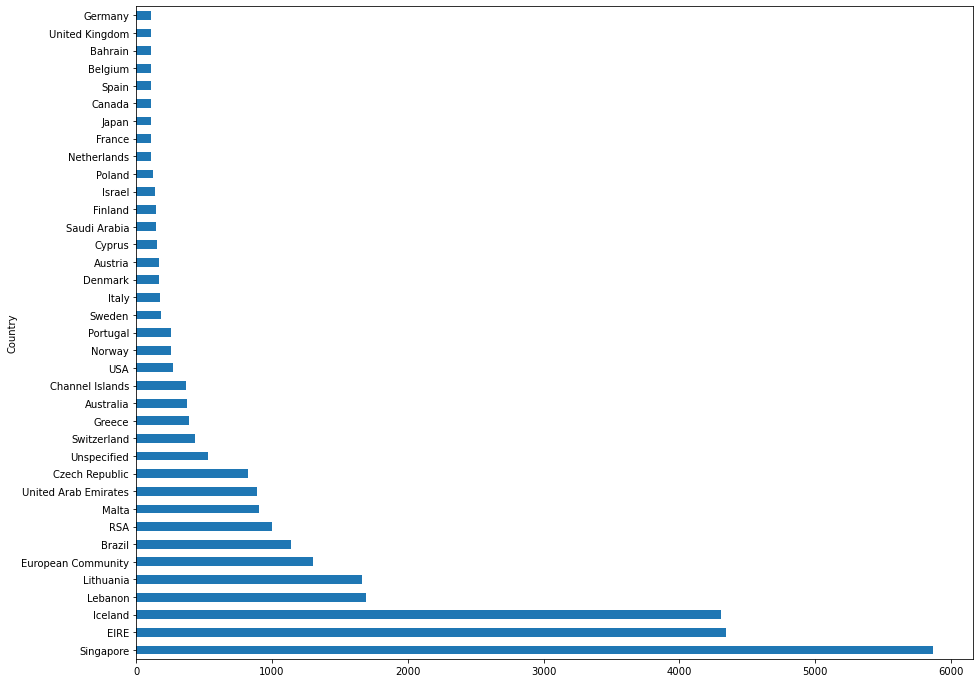

In [32]:
# Group the Minimum Total Amount by Country:
plt.figure(figsize=(15,12))
new1_df.groupby("Country").amount.min().sort_values(ascending=False).plot.barh()
plt.show()

As expected, Unitied Kingdom Spend the maximum Amount.

Lebanon is the country spend has least money for shopping.

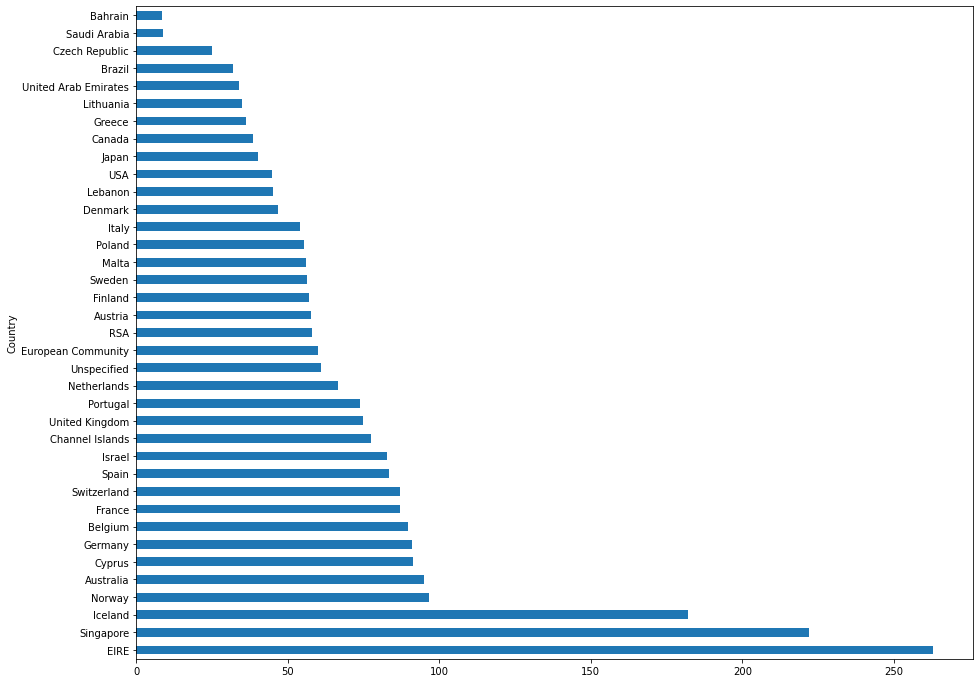

In [33]:
# Group by the Frequency by Country
plt.figure(figsize=(15,12))
new1_df.groupby("Country").InvoiceNo.mean().sort_values(ascending=False).plot.barh()
plt.show()

On Average, customers in EIRE shop most frequently

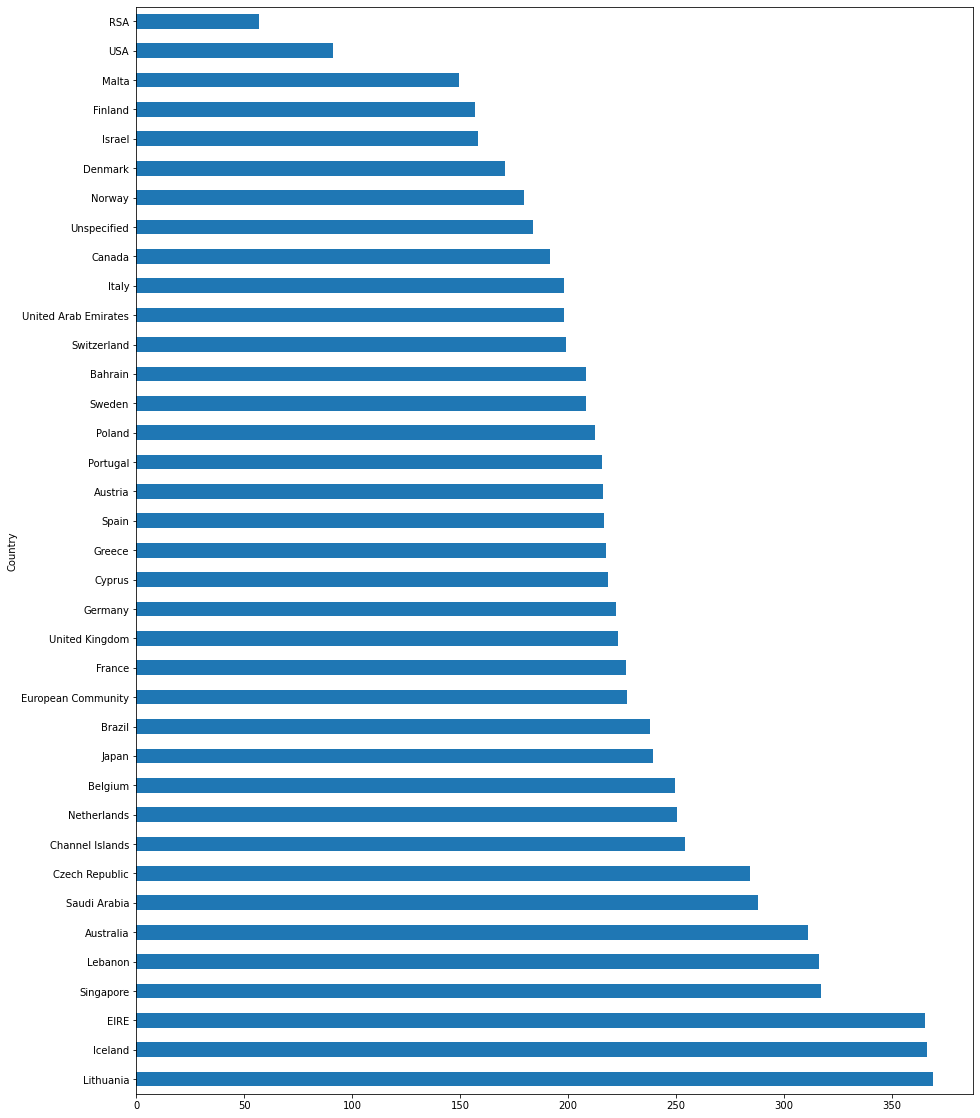

In [35]:
plt.figure(figsize=(15,20))
new1_df.groupby("Country").Last_transaction.mean().sort_values(ascending=False).plot.barh()
plt.show()

On average, Customers in Lithuania shop the most recently

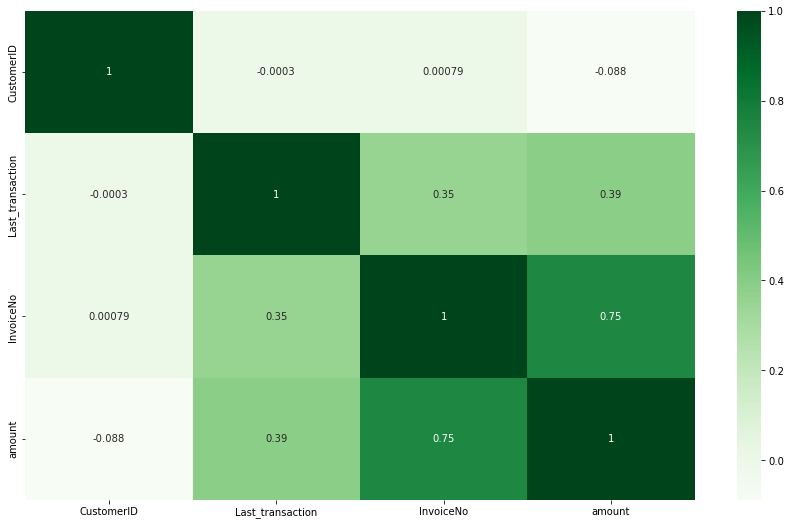

In [36]:
plt.figure(figsize=(15,9))
sns.heatmap(new1_df.corr(),cmap="Greens", annot=True)
plt.show()

Each square shows the correlation between the variables on each axis.

Values closer to zero means there is no linear trend between the two variables.

The close to 1 the correlation is the more positively correlated they are;

A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

As the heatmap shows, Total Amount and InvoiceNo is correlated positively

<Figure size 1080x576 with 0 Axes>

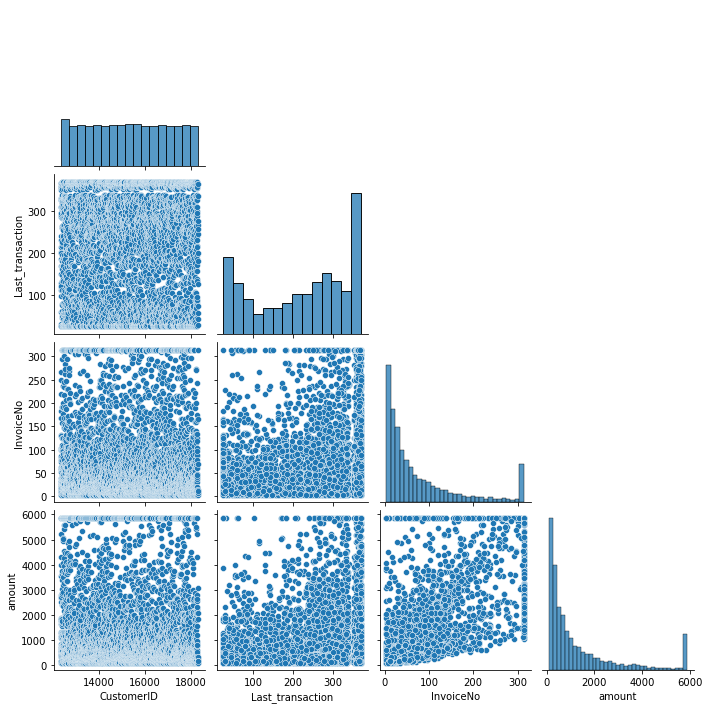

In [37]:
plt.figure(figsize=(15,8))
sns.pairplot(new1_df, corner=True)
plt.show()

In [38]:
#Scaling the numeric data
from sklearn.preprocessing import MinMaxScaler
new2_df=new1_df[['Last_transaction','InvoiceNo','amount']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns=['Last_transaction','InvoiceNo','amount']
scaled_df['Country']=new1_df['Country']
scaled_df

,Last_transaction,InvoiceNo,amount,Country
0,0.869565,0.000000,1.000000,United Kingdom
1,0.988406,0.574194,0.729051,Iceland
2,0.962319,0.087097,0.292643,Finland
3,0.000000,0.222581,0.285750,Italy
4,0.823188,0.041935,0.038582,Norway
...,...,...,...,...
4342,0.730435,0.019355,0.011871,United Kingdom
4343,0.449275,0.009677,0.000000,United Kingdom
4344,0.289855,0.025806,0.011428,United Kingdom
4345,0.901449,1.000000,0.344336,United Kingdom


# Clustering

In [39]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
df_k

,Last_transaction,InvoiceNo,amount
0,0.869565,0.000000,1.000000
1,0.988406,0.574194,0.729051
2,0.962319,0.087097,0.292643
3,0.000000,0.222581,0.285750
4,0.823188,0.041935,0.038582
...,...,...,...
4342,0.730435,0.019355,0.011871
4343,0.449275,0.009677,0.000000
4344,0.289855,0.025806,0.011428
4345,0.901449,1.000000,0.344336


In [42]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

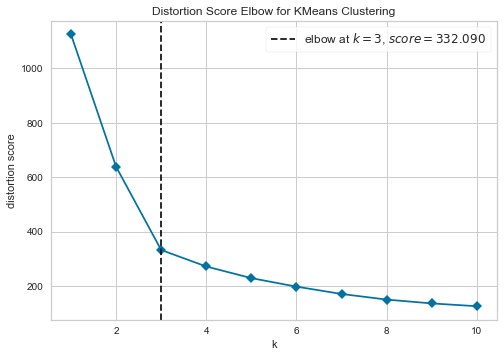

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

#### Elbow method helps us decide the clusters for our data are 3. Next step is to visualize the data by clusters

In [44]:
scaled_df

,Last_transaction,InvoiceNo,amount,Country
0,0.869565,0.000000,1.000000,United Kingdom
1,0.988406,0.574194,0.729051,Iceland
2,0.962319,0.087097,0.292643,Finland
3,0.000000,0.222581,0.285750,Italy
4,0.823188,0.041935,0.038582,Norway
...,...,...,...,...
4342,0.730435,0.019355,0.011871,United Kingdom
4343,0.449275,0.009677,0.000000,United Kingdom
4344,0.289855,0.025806,0.011428,United Kingdom
4345,0.901449,1.000000,0.344336,United Kingdom


In [45]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_k)
scaled_df['clusters']= y_predicted
scaled_df

,Last_transaction,InvoiceNo,amount,Country,clusters
0,0.869565,0.000000,1.000000,United Kingdom,2
1,0.988406,0.574194,0.729051,Iceland,2
2,0.962319,0.087097,0.292643,Finland,1
3,0.000000,0.222581,0.285750,Italy,0
4,0.823188,0.041935,0.038582,Norway,1
...,...,...,...,...,...
4342,0.730435,0.019355,0.011871,United Kingdom,1
4343,0.449275,0.009677,0.000000,United Kingdom,0
4344,0.289855,0.025806,0.011428,United Kingdom,0
4345,0.901449,1.000000,0.344336,United Kingdom,2


C:\Users\ROHIT\AppData\Local\Temp\ipykernel_23508\540446604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new2_df['clusters']= y_predicted


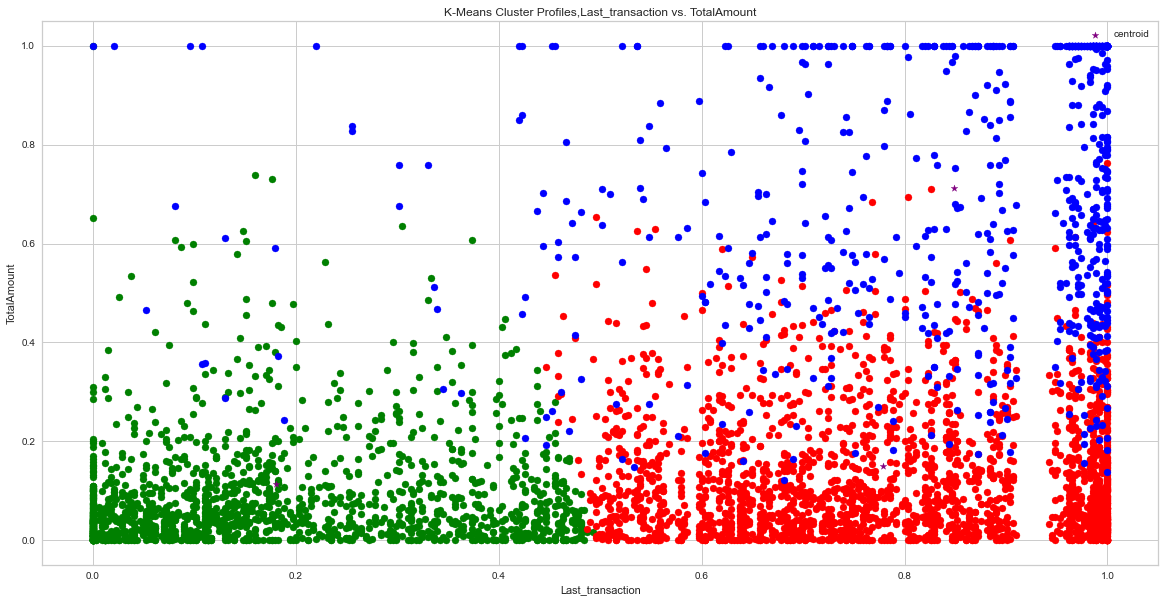

In [47]:
# Visualize the clusters with original data
new2_df['clusters']= y_predicted
df1 = scaled_df[new2_df.clusters==0]
df2 = scaled_df[new2_df.clusters==1]
df3 = scaled_df[new2_df.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Last_transaction,df1['amount'],color='green')
plt.scatter(df2.Last_transaction,df2['amount'],color='red')
plt.scatter(df3.Last_transaction,df3['amount'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

Group1: customer spent up to $2500 per purchase and their lastest order is within 3 months

Group2: customer spent up to $1500 per purchase and their lastest order is between 3 months to 13 months

Group3: customer spent from $ 1500 to 3500 per purchase and their lastest order varies from 1.5 month to 13 months

In [48]:
scaled_df

,Last_transaction,InvoiceNo,amount,Country,clusters
0,0.869565,0.000000,1.000000,United Kingdom,2
1,0.988406,0.574194,0.729051,Iceland,2
2,0.962319,0.087097,0.292643,Finland,1
3,0.000000,0.222581,0.285750,Italy,0
4,0.823188,0.041935,0.038582,Norway,1
...,...,...,...,...,...
4342,0.730435,0.019355,0.011871,United Kingdom,1
4343,0.449275,0.009677,0.000000,United Kingdom,0
4344,0.289855,0.025806,0.011428,United Kingdom,0
4345,0.901449,1.000000,0.344336,United Kingdom,2


C:\Users\ROHIT\AppData\Local\Temp\ipykernel_23508\404375578.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)


Text(0.5, 0.92, 'K Means')

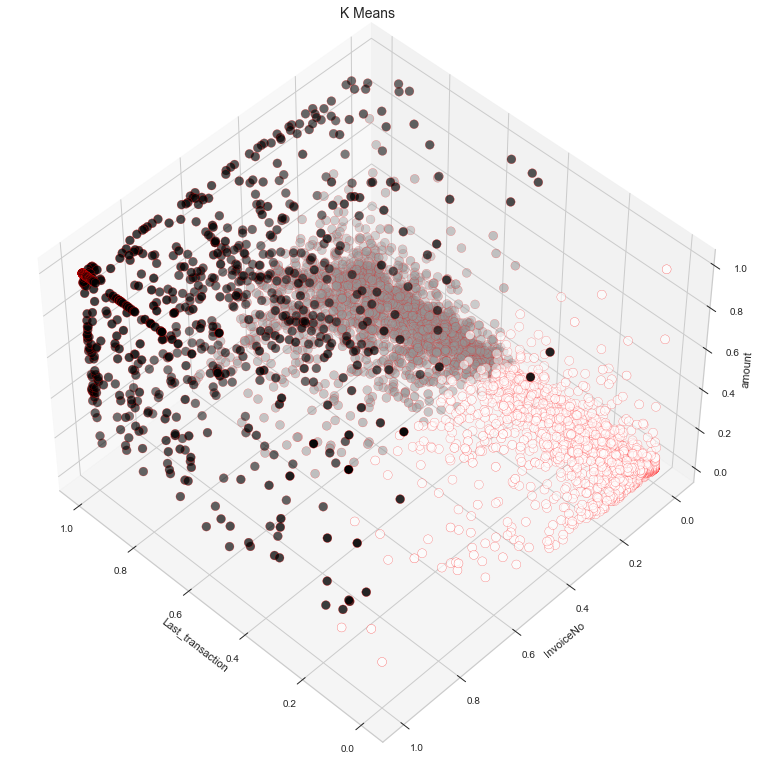

In [49]:
from mpl_toolkits.mplot3d import Axes3D
#Plotting
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(scaled_df['Last_transaction'], 
           scaled_df['InvoiceNo'], 
           scaled_df['amount'],
           c= (scaled_df['clusters']), 
           edgecolor="red", s=80)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("amount")
plt.title("K Means", fontsize=14)

here we got 3 types of customer here we can decide over marketting strategies as per over requirement